In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import ast #conversion of strings to python objects
from collections import Counter #count a number of occurences of items in a list
from DatasetCompiler import DatasetCompiler
import re

In [2]:
### Importing the data set ###
df=DatasetCompiler(existing=True).dataset #Does not generate a new one, only reads an existing one

In [9]:
#It appears that we have some non-unique values in our data set
non_unique=[]
for i in df['name']:
    if sum(df['name']==i)>1:
        non_unique.append(i)
    else:
        pass
print(f'{len(set(non_unique))} duplicates') #We have 78 duplicates
print(f'{len(df.loc[df["name"].isin(non_unique),:])} duplicate rows in total') #Which makes 192 rows total
#We cannot use the name column as an index

78 duplicates
192 duplicate rows in total


In [10]:
df[df['name'].isin(non_unique)]

,name,address,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
52,AP TRUST a.s.,"nám. Republiky 1/1078, 110 00 Praha 1-Nové Město",Praha 1,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 222 311 221'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.089204, 'longitude': 14.428594}"
53,AP TRUST a.s.,"Hybernská 24/1009, 110 00 Praha 1-Nové Město",Praha 1,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 378 121 301'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.086917, 'longitude': 14.433777}"
87,Balbínova poetická spol. s r.o.,"Balbínova 3/224, 120 00 Praha-Vinohrady",Praha 1,100.0,1,NaN,NaN,NaN,{'hlavní telefon': '+420 222 363 205'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.077236, 'longitude': 14.433388}"
89,Balbínova poetická spol. s r.o.,"Jungmannova 22/742, 110 00 Praha-Nové Město",Praha 1,0.0,0,NaN,NaN,NaN,"{'hlavní telefon': '+420 226 804 980', 'další ...",NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.081603, 'longitude': 14.422662}"
92,BANYAN - čajovna Praha Vinohrady,"Jana Masaryka 312/46, 120 00 Praha 2-Vinohrady",Praha 2,0.0,0,"{'Po': '14 - 23:59', 'Út': '14 - 23:59', 'St':...","{'Po': 9.98, 'Út': 9.98, 'St': 9.98, 'Čt': 9.9...",NaN,{'hlavní telefon': '+420 722 779 133'},http://www.cajovnabanyan.cz,[hotově],NaN,NaN,NaN,"{'latitude': 50.0722723, 'longitude': 14.4404889}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,Restaurace Globus,"Chlumecká 765/6, 198 00 Praha 9-Černý Most",Praha 9,0.0,0,"{'Po': '7 - 21', 'Út': '7 - 21', 'St': '7 - 21...","{'Po': 14.0, 'Út': 14.0, 'St': 14.0, 'Čt': 14....",NaN,{'Main': '+420 800 241 242'},https://www.globus.cz/cerny-most/nabidka/resta...,"[American Express, hotově, DINERSCLUB, faktura...","[Vegetariánská jídla, Bezlepková jídla, Vegans...","[Restaurace, Každý den čerstvé, Týdenní menu, ...",NaN,"{'latitude': 50.10962677001953, 'longitude': 1..."
2164,Restaurace Globus,"Kostelecká 822/75, 196 00 Praha-Čakovice",Praha 9,0.0,0,"{'Po': '7 - 21', 'Út': '7 - 21', 'St': '7 - 21...","{'Po': 14.0, 'Út': 14.0, 'St': 14.0, 'Čt': 14....",NaN,{'Main': '+420 800 241 242'},https://www.globus.cz/praha-cakovice/nabidka/r...,"[American Express, hotově, DINERSCLUB, faktura...","[Vegetariánská jídla, Bezlepková jídla, Vegans...","[Restaurace, Každý den čerstvé, Týdenní menu, ...",NaN,"{'latitude': 50.15133285522461, 'longitude': 1..."
2183,Subway,"Jindrišská 30, Prague",Not found,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 739 767 952'},https://restaurants.subway.com/cs/cesko/prague...,NaN,NaN,NaN,NaN,"{'latitude': 50.0848274230957, 'longitude': 14..."
2184,Subway,Prague Main Train Station,Not found,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 604 777 595'},https://restaurants.subway.com/cs/ceska-republ...,NaN,NaN,NaN,NaN,"{'latitude': 50.08316421508789, 'longitude': 1..."


In [6]:
df.head()

,name,address,dist_dict,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
0,Repre restaurant,"Nekázanka 4/857, 110 00 Praha 1-Nové Městookre...","{'Praha 1': ['Praha 1', 'Staré Město (Praha)',...",Praha 1,0.0,0,"{'Po': '10:30 - 23', 'Út': '10:30 - 23', 'St':...","{'Po': 12.5, 'Út': 12.5, 'St': 12.5, 'Čt': 12....",rezervace@repre-restaurant.cz,{'Restaurace Praha 1': '+420 222 211 451'},http://www.repre-restaurant.cz,"[faktura, hotově, VISA, MASTERCARD, CHEQUEDEJE...",[taneční parket],"[česká kuchyně, mezinárodní kuchyně, nekuřácký...","[salónek, klimatizace, bezbariérový přístup]","{'latitude': 50.08553, 'longitude': 14.42718}"
1,Restaurace Nad Ledem,"Vladivostocká 1460/10, 100 00 Praha 10-Vršovic...","{'Praha 1': ['Praha 1', 'Staré Město (Praha)',...",Praha 10,100.0,1,"{'Po': '10 - 23', 'Út': '10 - 23', 'St': '10 -...","{'Po': 13.0, 'Út': 13.0, 'St': 13.0, 'Čt': 13....",nadledem@seznam.cz,{'Restaurace Praha 10': '+420 728 464 824'},https://restauracenadledem.cz/,"[hotově, faktura, MASTERCARD, VISA]","[Denní menu, Pivo z tanku, Točené limonády, Ne...","[Restaurace, Bezbariérový vstup, Letní zahrádk...","[Kofola, Birell, Pilsner Urquell]","{'latitude': 50.068558, 'longitude': 14.4777165}"
2,SRI LANKAN CURRY HOUSE,"U vodárny 10/898, 130 00 Praha 3-Vinohradyokre...","{'Praha 1': ['Praha 1', 'Staré Město (Praha)',...",Praha 3,100.0,1,"{'Po': '11 - 22', 'Út': '11 - 22', 'St': '11 -...","{'Po': 11.0, 'Út': 11.0, 'St': 11.0, 'Čt': 11....",srilankancurryhouse@gmail.com,{'hlavní telefon': '+420 603 118 707'},https://srilankanrestaurant.cz/,"[hotově, faktura, VISA, MASTERCARD]","[polévky, předkrmy, zeleninové kari, pikantní ...",[restaurace],NaN,"{'latitude': 50.07646, 'longitude': 14.44919}"
3,Restaurace HOOTERS Vodičkova,"Vodičkova 5/12, 120 00 Praha 2-Nové Městookres...","{'Praha 1': ['Praha 1', 'Staré Město (Praha)',...",Praha 2,0.0,0,"{'Po': '11 - 23', 'Út': '11 - 23', 'St': '11 -...","{'Po': 12.0, 'Út': 12.0, 'St': 12.0, 'Čt': 12....",vodickova@hooters.cz,{'Rezervace': '+420 602 799 222'},http://hooters.cz/cz/vodickova?utm_source=Mext...,"[American Express, VISA, hotově, faktura, SODE...","[předkrmy, polévky, quesadillas, burgery, příl...","[restaurace, sportovní přenosy, rozlučky se sv...","[HOOTERS, Pilsner Urquell, Coca Cola]","{'latitude': 50.078701, 'longitude': 14.421425}"
4,1. MEXICKÁ RESTAURACE,"Újezd 38/430, 118 00 Praha 1-Malá Stranaokres ...","{'Praha 1': ['Praha 1', 'Staré Město (Praha)',...",Praha 1,89.0,2,"{'Po': '11:30 - 23:59', 'Út': '11:30 - 23:59',...","{'Po': 12.48, 'Út': 12.48, 'St': 12.48, 'Čt': ...",NaN,{'hlavní telefon': '+420 257 317 173'},NaN,[hotově],NaN,NaN,NaN,"{'latitude': 50.08294, 'longitude': 14.40461}"


In [3]:
df[pd.isna(df.coordinates)] #Only one single restaurant does not have coordinates 

,name,address,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
745,Céleste,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#It is closed => we will drop it
try:
    ind=list(pd.isna(df.coordinates)).index(True) #index to be dropped
    df.drop(ind,inplace=True)
except IndexError:
    print('The value has been already removed')

In [5]:
district_counts=df.district.value_counts() #Currently administrative district => maybe should aggregate to municipal districts
district_counts

Praha 1      664
Praha 2      215
Praha 5      214
Praha 4      206
Praha 6      157
Praha 10     140
Praha 3      129
Praha 9      125
Praha 8      124
Not found    112
Praha 7      105
Name: district, dtype: int64

In [6]:
#inspecting 'Not found' district
problematic_addresses=list(df[df.district=='Not found']['address']) #We are left with addresses containg only a street number => cannot get the district
#IDEA! match PSČ to districts!

In [19]:
zip_codes=[]
for address in problematic_addresses:
    try:
        zip_codes.append(re.search('[0-9]{3} [0-9]{2}',address).group(0))
    except AttributeError:
        zip_codes.append(None)

In [20]:
district_from_zip=[]
for zip_code in zip_codes:
    if zip_code:
        if zip_code[1]=='0':
            value='10'
        else:
            value=zip_code[1]
        district_from_zip.append('Praha '+value)
    else:
        district_from_zip.append(None)

In [25]:
len([j for i,j in enumerate(problematic_addresses) if zip_codes[i]==None])

56

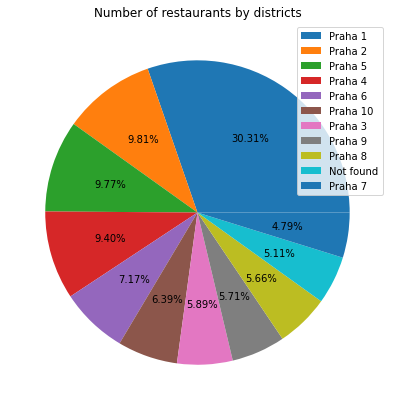

In [17]:
fig_size=plt.figure(figsize=(7,7))
#district_pie=plt.pie(district_counts.values,labels=district_counts.index,labeldistance=None)
#title=plt.title('Number of restaurants by districts')
#legend=plt.legend()
district_counts.plot.pie(labeldistance=None, autopct='%1.2f%%')
plt.title('Number of restaurants by districts')
plt.ylabel('')
plt.legend()

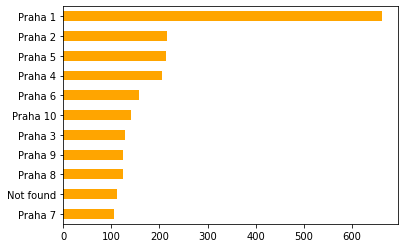

In [18]:
#fig_size=plt.figure(figsize=(8,8))
district_counts.plot.barh(color='orange').invert_yaxis()

In [19]:
#Summing the spans
list_of_sums_of_spans=[]
for dict in df.opening_hours_span:
    if pd.isna(dict):
        value=np.NaN
    else:
        value=sum(filter(None,list(dict.values()))) #we make a list from the dicts values, filter out the None values and sum it
    list_of_sums_of_spans.append(value)

In [20]:
array_of_sums_of_spans=np.array(list_of_sums_of_spans)
print(str(np.sum(array_of_sums_of_spans==max(array_of_sums_of_spans)))+' '+'nonstop restaurants in Prague')
print(str(np.around(np.mean(array_of_sums_of_spans,where=[not i for i in np.isnan(array_of_sums_of_spans)]),2))+' '+'is the mean number of opening hours in a week')
print(str(np.around(np.median(array_of_sums_of_spans[[not i for i in np.isnan(array_of_sums_of_spans)]]),2))+' '+'is the median number of opening hours in a week')
print('Opening hours available for '+str(sum([not i for i in pd.isna(df.opening_hours)]))+' restaurants')
print('Opening hours span available for '+str(sum([not i for i in pd.isna(df.opening_hours_span)]))+' restaurants')
min_span=np.around(np.min(array_of_sums_of_spans[([not i for i in np.isnan(array_of_sums_of_spans)]) & (array_of_sums_of_spans!=0)]),2)
print(f'Lowest opening span ({min_span}): {df.name[array_of_sums_of_spans==min_span].values[0]}')

26 nonstop restaurants in Prague
82.32 is the mean number of opening hours in a week
84.0 is the median number of opening hours in a week
Opening hours available for 881 restaurants
Opening hours span available for 881 restaurants
Lowest opening span (17.5): Momento


In [21]:
df[array_of_sums_of_spans==0] 
#weird opening hours (computed as 0)
#https://www.zlatestranky.cz/profil/H757493
#https://www.zlatestranky.cz/profil/H14470
#https://www.zlatestranky.cz/profil/H2048283
#https://www.zlatestranky.cz/profil/H1433739
#https://www.zlatestranky.cz/profil/H1441575

,name,address,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
109,Be Bop Lobby Bar,"Štěpánská 40, 110 00 Praha 1-Nové Město",Praha 1,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",bebopbar@radissonblu.com,"{'hlavní telefon': '+420 222 820 420', 'Telefo...",https://www.bebopbar.cz/,[hotově],"[Koktejly a drinky, BeBop Signatures, Be Drive...","[Lobby Bar, Moderní gastronomie, Barmanské akc...","[Royal Oporto, Fonseca Bin, Cinzano Bianco, Gr...","{'latitude': 50.0800654, 'longitude': 14.426618}"
262,ČÍNSKÁ RESTAURACE,"Kubánské nám. 2/1283, 100 00 Praha 10-Vršovice",Praha 10,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",NaN,{'hlavní telefon': '+420 267 311 492'},NaN,[hotově],"[čínská kuchyně, nápoje]",[restaurace],NaN,"{'latitude': 50.071238, 'longitude': 14.47675}"
405,"Forbidden Taste Prague, s.r.o.","Služská 15/1865, 182 00 Praha 8-Kobylisy",Praha 8,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",popup@forbiddentaste.com,{'hlavní telefon': '+420 732 334 322'},http://forbiddentaste.com,NaN,NaN,"[restaurace, umění, gastronomický zážitek]",NaN,"{'latitude': 50.12404, 'longitude': 14.44935}"
767,Lehká hlava - vegetariánská restaurace,"Boršov 280/2, 110 00 Praha 1-Staré Město",Praha 1,82.0,1,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",info@lehkahlava.cz,{'Main': '+420 222 220 665'},http://www.lehkahlava.cz,"[hotově, faktura, MASTERCARD, VISA]","[Vegetariánská kuchyně, Předkrmy, Polévky, Sal...","[Nekuřácká restaurace, Unikátní interiér, Přát...","[Pilsner Urquell, Bernard, Birell, Cider, Aper...","{'latitude': 50.08409118652344, 'longitude': 1..."
1007,PIVNICE SPARTA,"Cíglerova 1142, 193 00 Praha",Not found,0.0,0,"{'Po': None, 'Út': None, 'St': None, 'Čt': Non...","{'Po': None, 'Út': None, 'St': None, 'Čt': Non...",moravec.martin@inmail.cz,{'hlavní telefon': '+420 608 319 611'},http://www.salonek-praha-9.cz,"[TICKETRESTAURANT, hotově]","[firemní rauty, firemní večírky, pořádání svat...",[společesnké akce],"[Gambrinus, Kozel]","{'latitude': 50.106742, 'longitude': 14.562658}"


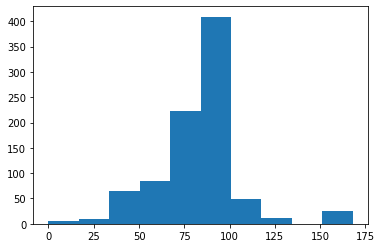

In [22]:
spans_hist=plt.hist(array_of_sums_of_spans)

In [23]:
print('Missing values of review_count: '+str(sum(pd.isna(df.review_count))))
print('Missing values of ratings: '+str(sum(pd.isna(df.ratings))))
print('At least one review: ',str(sum(df.review_count!=0)))
print(f'Highest number of reviews: {max(df.review_count)}')
available_ratings=df.ratings[df.review_count!=0]
print('Mean average of available ratings: '+str(np.around(np.mean(available_ratings),2))+' out of 100')
print('Restaurants with the lowest rating: '+'('+str(min(available_ratings))+') '+", ".join(list(df.name[df.ratings==min(available_ratings)])))
print('Restaurants with the highest rating: '+'('+str(max(available_ratings))+') '+", ".join(list(df.name[df.ratings==max(available_ratings)])))

Missing values of review_count: 0
Missing values of ratings: 0
At least one review:  180
Highest number of reviews: 8
Mean average of available ratings: 82.83 out of 100
Restaurants with the lowest rating: (10.0) Culinary Aroma, RESTAURACE NA JEZERCE, RESTAURACE TERASY, Špejchar - staročeský restaurant
Restaurants with the highest rating: (100.0) Restaurace Nad Ledem, SRI LANKAN CURRY HOUSE, ART&FOOD Had, Balbínova poetická spol. s r.o., CAFE DE PARIS, CAFFEINE s.r.o., ČÍNSKÁ RESTAURACE CHONG FA JIU DIAN, EURO HOT DOG spol. s r.o., Hostinec U Rozcestí, KLUB LÁVKA, Lavande Restaurant, MANU Risto & Lounge, Pinta - pivní steakhouse, Příčný Řez, RESTAURACE CORLEONE, RESTAURACE CHMELNICE, Restaurace K-CLUB, RESTAURACE RETRO KAVÁRNA, Restaurace Selský statek, RESTAURACE TLUSTÁ KOALA, RESTAURACE U BRÁZDŮ, Restaurace U Dědka, Restaurace U Kristiána, Restaurace U Lípy, RESTAURACE U PECKŮ, RESTAURACE U SV. FILIPA A JAKUBA, RESTAURACE U VAZAČŮ, Restaurace Zubajda - Smíchov, Restaurant PEKLO, Rest

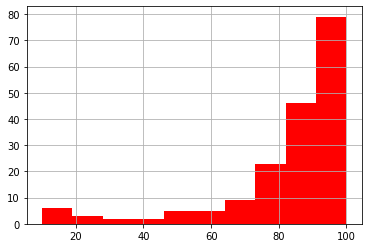

In [24]:
ratings_hist=df.ratings[df.ratings!=0].hist(color='red')

In [25]:
payment_methods=[]
for payment_method in df.payment_methods:
    if type(payment_method)==type([]): #if its a list we need to unpack it
        payment_methods.extend(payment_method)
    elif pd.isna(payment_method): #if it is nan, we do not need it
        pass
    else:
        payment_methods.append(payment_method) #if it is a single value, we append it

In [26]:
payment_methods_counts=Counter(payment_methods)
payment_methods_counts_filtered={key:value for key, value in payment_methods_counts.items() if value>=10} #Filtering out low values

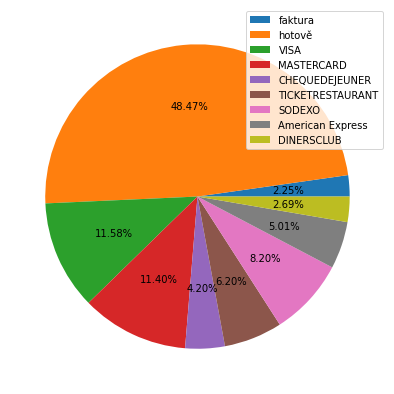

In [27]:
#Pie is probably not the best idea for this kind of data
fig_size=plt.figure(figsize=(7,7))
payment_methods_pie=plt.pie(payment_methods_counts_filtered.values(),labels=payment_methods_counts_filtered.keys(),labeldistance=None, autopct='%1.2f%%')
legend=plt.legend()

In [28]:
items_sorted=sorted(payment_methods_counts_filtered.items(),key=lambda x:x[1]) #sorting the items in the dictionary
payment_methods_counts_filtered_sorted={key:value for key, value in items_sorted} #creating a new dictionary from sorted items

Text(0.5, 1.0, 'Payment methods')

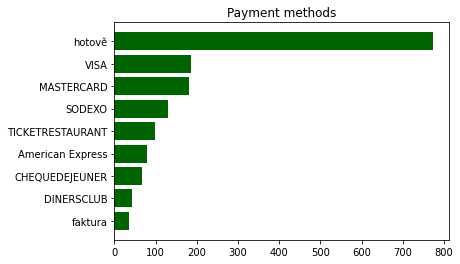

In [29]:
plt.barh(list(payment_methods_counts_filtered_sorted.keys()),payment_methods_counts_filtered_sorted.values(),color='darkgreen') #plotting
plt.title('Payment methods')

In [30]:
#Creating a dictionary with 'products', 'services', and 'marks' as keys and with list containing respective values from each column as values
pro_ser_mar_dict={}
for column in ['products', 'services', 'marks']:
    demo_list=[]
    for value in df[column]:
        if type(value)==type([]): #if its a list we need to unpack it
            demo_list.extend(value)
        elif pd.isna(value): #if it is nan, we do not need it
            pass
        else:
            demo_list.append(value) #if it is a single value, we append it
    pro_ser_mar_dict[column]=demo_list

In [48]:
#Converting the values to lowercase to avoid duplicates
pro_ser_mar_dict_lower={key:[value.lower() for value in values] for key, values in pro_ser_mar_dict.items()}

In [49]:
#Computing value counts
pro_ser_mar_counter={key:Counter(value) for key, value in pro_ser_mar_dict_lower.items()}

In [51]:
#Filtering out low occurrences
pro_ser_mar_counter_filtered={}
for item in pro_ser_mar_counter.keys():
    pro_ser_mar_counter_filtered[item]={key:value for key, value in pro_ser_mar_counter[item].items() if value>=10}

In [52]:
#Sorting the values from highest to lowest
pro_ser_mar_counter_filtered_sorted={}
for item in pro_ser_mar_counter_filtered.keys():
    items_sorted=sorted(pro_ser_mar_counter_filtered[item].items(),key=lambda x:x[1]) #sorting the items in the dictionary
    pro_ser_mar_counter_filtered_sorted[item]={key:value for key, value in items_sorted} #creating a new dictionary from sorted items


Text(0.5, 1.0, 'Products')

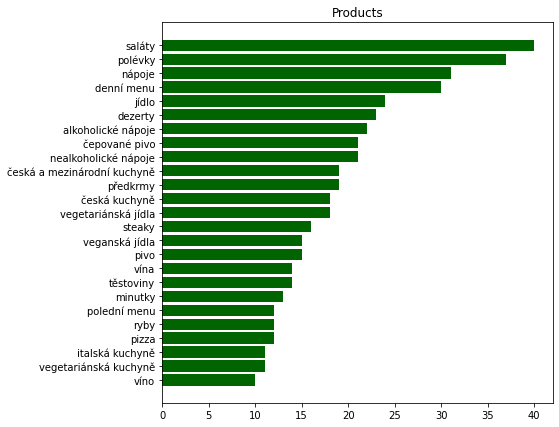

In [53]:
plt.figure(figsize=(7,7))
plt.barh(list(pro_ser_mar_counter_filtered_sorted['products'].keys()),pro_ser_mar_counter_filtered_sorted['products'].values(),color='darkgreen') #plotting
plt.title('Products')

Text(0.5, 1.0, 'Services')

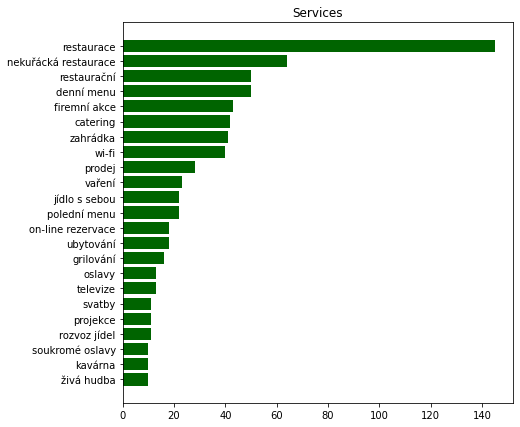

In [54]:
plt.figure(figsize=(7,7))
plt.barh(list(pro_ser_mar_counter_filtered_sorted['services'].keys()),pro_ser_mar_counter_filtered_sorted['services'].values(),color='darkgreen') #plotting
plt.title('Services')

Text(0.5, 1.0, 'Marks')

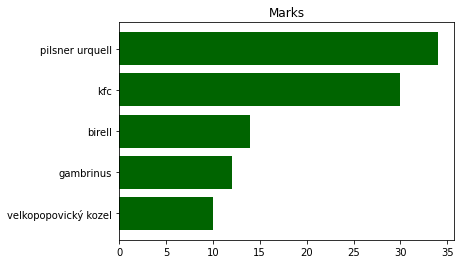

In [55]:
#plt.figure(figsize=(7,7))
plt.barh(list(pro_ser_mar_counter_filtered_sorted['marks'].keys()),pro_ser_mar_counter_filtered_sorted['marks'].values(),color='darkgreen') #plotting
plt.title('Marks')

In [56]:
#Number of phones available by restaurant
no_of_phones=[]
for phones_dict in df['phones']:
    no_of_phones.append(len(phones_dict))

In [57]:
#Counting the occurences
no_of_phones_counts=Counter(no_of_phones)

Text(0.5, 1.0, 'Number of phones available')

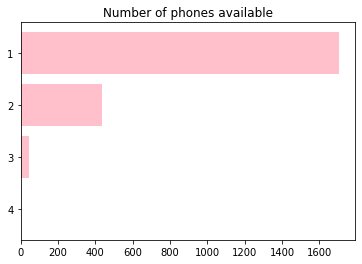

In [58]:
#Plotting
plt.barh(list([str(key) for key in no_of_phones_counts.keys()]),no_of_phones_counts.values(),color='pink')
plt.gca().invert_yaxis() #to sort it from highest to lowest
plt.title('Number of phones available')